# **DATA SCIENCE SALARIES 2023**
 **COMPLETE EXPLORATORY DATA ANALYSIS**

### **About Dataset**

- **`Description`**
- > The Data Set was downloaded from Kaggle, from the following [link](https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023/data/)

- `Context`
This dataset contains detailed information about data scientists' salaries, including various attributes such as job titles, experience levels, employment types, and geographic information. The goal is to analyze the salary trends and factors influencing the salaries of data scientists across different regions and companies.

- `Content`
Each (row) has values for job catergory, work years, experience,salary and more.

- `Acknowledgements`
This information is scraped from the different AIsources.

# **Dataset Columns**:
- `Work_year`: The year the salary was reported.
- `Experience_level`: The level of experience (e.g., SE for Senior, MI for Mid-level, EN for Entry-level, etc.).
- `Employment_type`: The type of employment (e.g., FT for Full-time, PT for Part-time, CT for Contract time, FL for Freelance).
- `Job_title`: The job title (e.g., Data Scientist, ML Engineer, etc.).
- `Salary`: The reported salary in the specified currency.
- `Salary_currency`: The currency in which the salary is paid.
- `Salary_in_usd`: The salary converted to USD for standardization.
- `Employee_residence`: The country where the employee resides.
- `Remote_ratio`: The percentage of remote work (0 for on-site, 50 for hybrid, 100 for fully remote).
- `Company_location`: The location of the company.
- `Company_size`: The size of the company (S for Small, M for Medium, L for Large)

# **Importing Libraries.**

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pycountry
import plotly.express as px

## 2. **Data Loading and exploration and cleaning**
 ↪ Load the csv file with the pandas
 
 ↪ creating the dataframe and understanding the data present in the dataset using pandas
 
 ↪ Dealing with the missing data, outliers and the incorrect records

In [2]:
df=pd.read_csv('./ds_salaries.csv')

- Viewing the first five Rows of the data

In [3]:
df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [4]:
pd.set_option('display.max_columns', None) # this is to display all the columns in the dataframe
pd.set_option('display.max_rows', None) # this is to display all the rows in the dataframe

In [5]:
# hide all warnings runtime
import warnings
warnings.filterwarnings('ignore')

- let's see the exact column names which can be easily copied later on from Data Science salaries Dataset

In [6]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

- lets have a look on the shape of dataset.

In [7]:
df.shape

(3755, 11)

- Not enough, let's have a look on the columns and their data types using detailed info function.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


### **Observations**
---
1. There are 3755 rows and 11 columns in the dataset
2. The columns are of different data types
3. The columns in the datasets are:
   - `'work_year', 'experience_level', 'employment_level', 'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location', 'company_size',`
4. There is no missing values in the dataset.

In [9]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


### **Observations:**
---
- We have only 2 columns as object data type, (according to python), but we can see that `'experience_level', 'company_level'` are also numeric, we must convert them to numeric data type in data wrangling process.
---

# **Let's clean the Data**

In [10]:
#check for duplicate values
df.duplicated().sum()

np.int64(1171)

In [11]:
# drop the duplicate values 
df1= df.drop_duplicates()
df1.reset_index(drop=True, inplace=True)
df1.shape

(2584, 11)

- **There are 3755 rows and 11 columns before dropping duplicate values.**
- **Now , there are 2584 rows and 11 columns after dropping duplicate values.**
- **There are 1171 duplicate values which are removed.**

In [12]:
#checking the null values
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

- **No null values, this is good**.

In [13]:
#Now describe the data 
df1.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
work_year,2584.0,NaN,NaN,NaN,2022.301084,0.749179,2020.0,2022.0,2022.0,2023.0,2023.0
experience_level,2584,4,SE,1554,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employment_type,2584,4,FT,2547,NaN,NaN,NaN,NaN,NaN,NaN,NaN
job_title,2584,93,Data Engineer,598,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary,2584.0,NaN,NaN,NaN,210365.29644,808037.535609,6000.0,90000.0,134630.0,182562.5,30400000.0
salary_currency,2584,20,USD,2107,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary_in_usd,2584.0,NaN,NaN,NaN,133409.280186,67136.837329,5132.0,84975.0,130000.0,175000.0,450000.0
employee_residence,2584,78,US,1893,NaN,NaN,NaN,NaN,NaN,NaN,NaN
remote_ratio,2584.0,NaN,NaN,NaN,50.483746,48.163707,0.0,0.0,50.0,100.0,100.0
company_location,2584,72,US,1929,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **Observations:**
---
- The work year ranges from 2020 to 2023.
- Experience levels range from Entry-level (EN) to Executive (EX), with Senior (SE) being the most frequent.
- Most of the Employment type are FT (full time).
- There are 93 job titles and most frequent title is Data Engineer.
- Salaries range widely, with significant variation as shown by the high standard deviation.
- The majority of salaries are reported in USD.
- Majority of the employee residence are in US.
- The remote ratio is 100%.
- Companies are located in 72 different countries, with the US being the most common location.
- Companies size are mentioned in 3 categories Small (S), Medium(M), Large(L).


In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2584 entries, 0 to 2583
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           2584 non-null   int64 
 1   experience_level    2584 non-null   object
 2   employment_type     2584 non-null   object
 3   job_title           2584 non-null   object
 4   salary              2584 non-null   int64 
 5   salary_currency     2584 non-null   object
 6   salary_in_usd       2584 non-null   int64 
 7   employee_residence  2584 non-null   object
 8   remote_ratio        2584 non-null   int64 
 9   company_location    2584 non-null   object
 10  company_size        2584 non-null   object
dtypes: int64(4), object(7)
memory usage: 222.2+ KB


- The DataFrame consists of `2584` entries across `11` columns. All columns are fully populated with no missing values. The data types include integers and objects (strings), and the total memory usage is approximately `222.2 KB`.

In [15]:
# Removing two columns to reduce complexity.
df2 = df1.drop(['salary', 'salary_currency'], axis=1)

- we remove two columns `salary`, `salary_currency` from the dataframe `df` and store the result in `df2` to reduce complexity in data. we just focus on `salary_in_usd`

In [16]:
df2.head(5)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M


- See the columns are `11` and two columns are removed.

In [17]:
print('Experience level: ', df2['experience_level'].unique())
print('Employment type: ', df2['employment_type'].unique())
print('Employee residence: ', df2['employee_residence'].unique())
print('Company location: ', df2['company_location'].unique())
print('Company size: ', df2['company_size'].unique())

Experience level:  ['SE' 'MI' 'EN' 'EX']
Employment type:  ['FT' 'CT' 'FL' 'PT']
Employee residence:  ['ES' 'US' 'CA' 'DE' 'GB' 'NG' 'IN' 'HK' 'PT' 'NL' 'CH' 'CF' 'FR' 'AU'
 'FI' 'UA' 'IE' 'IL' 'GH' 'AT' 'CO' 'SG' 'SE' 'SI' 'MX' 'UZ' 'BR' 'TH'
 'HR' 'PL' 'KW' 'VN' 'CY' 'AR' 'AM' 'BA' 'KE' 'GR' 'MK' 'LV' 'RO' 'PK'
 'IT' 'MA' 'LT' 'BE' 'AS' 'IR' 'HU' 'SK' 'CN' 'CZ' 'CR' 'TR' 'CL' 'PR'
 'DK' 'BO' 'PH' 'DO' 'EG' 'ID' 'AE' 'MY' 'JP' 'EE' 'HN' 'TN' 'RU' 'DZ'
 'IQ' 'BG' 'JE' 'RS' 'NZ' 'MD' 'LU' 'MT']
Company location:  ['ES' 'US' 'CA' 'DE' 'GB' 'NG' 'IN' 'HK' 'NL' 'CH' 'CF' 'FR' 'FI' 'UA'
 'IE' 'IL' 'GH' 'CO' 'SG' 'AU' 'SE' 'SI' 'MX' 'BR' 'PT' 'RU' 'TH' 'HR'
 'VN' 'EE' 'AM' 'BA' 'KE' 'GR' 'MK' 'LV' 'RO' 'PK' 'IT' 'MA' 'PL' 'AL'
 'AR' 'LT' 'AS' 'CR' 'IR' 'BS' 'HU' 'AT' 'SK' 'CZ' 'TR' 'PR' 'DK' 'BO'
 'PH' 'BE' 'ID' 'EG' 'AE' 'LU' 'MY' 'HN' 'JP' 'DZ' 'IQ' 'CN' 'NZ' 'CL'
 'MD' 'MT']
Company size:  ['L' 'S' 'M']


- Here we just check the unique values in data for further process in cleaning.

In [18]:
experience_level_map = {
    'SE': 'Senior',
    'MI': 'Middle',
    'EN': 'Junior',
    'EX': 'Executive'
}

employment_type_map = {
    'FT': 'Full Time',
    'CT': 'Contract',
    'FL': 'Freelance',
    'PT': 'Part Time'
}

remote_ratio_map = {
    0: 'Not Remote',
    50: 'Half Remote',
    100: 'Full Remote'
}

company_size_map = {
    'L': 'Large',
    'S': 'Small',
    'M': 'Medium'
}

In [19]:
df3 = df2.copy()
df3['experience_level'] = df3['experience_level'].map(experience_level_map)
df3['employment_type'] = df3['employment_type'].map(employment_type_map)
df3['company_size'] = df3['company_size'].map(company_size_map)
df3['remote_ratio'] = df3['remote_ratio'].map(remote_ratio_map)

In [20]:
df3.sample(5)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
552,2023,Middle,Full Time,Data Engineer,85066,GB,Full Remote,GB,Medium
1334,2022,Senior,Full Time,Research Scientist,210000,US,Full Remote,US,Medium
1586,2022,Senior,Full Time,Data Scientist,247500,US,Not Remote,US,Medium
1391,2022,Senior,Full Time,Data Analyst,89200,US,Full Remote,US,Medium
740,2023,Senior,Full Time,Data Engineer,80000,US,Not Remote,US,Medium


### **In the above code:**
- We'll map abbreviated codes to more descriptive terms for better clarity and understanding.

In [21]:
df4 = df3.copy()


def convert_iso2_to_iso3(iso2):
    try:
        return pycountry.countries.get(alpha_2=iso2).alpha_3
    except:
        return None


df4['company_location'] = df4['company_location'].apply(convert_iso2_to_iso3)
df4['employee_residence'] = df4['employee_residence'].apply(convert_iso2_to_iso3)
df4.head(5)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior,Full Time,Principal Data Scientist,85847,ESP,Full Remote,ESP,Large
1,2023,Middle,Contract,ML Engineer,30000,USA,Full Remote,USA,Small
2,2023,Middle,Contract,ML Engineer,25500,USA,Full Remote,USA,Small
3,2023,Senior,Full Time,Data Scientist,175000,CAN,Full Remote,CAN,Medium
4,2023,Senior,Full Time,Data Scientist,120000,CAN,Full Remote,CAN,Medium


### **In this case:**
 - The code converts 2-letter country codes to 3-letter codes using pycountry library, enabling compatibility with Plotly choropleth library for world map visualization. This conversion ensures accurate mapping of data to countries for effective visualization.

In [22]:
# check if there is any null values
df4.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

- We again check there is no null values in the dataset.

> - So this is cleaning phase and we clean all the data and removing duplicate values and null values and replace some values names with other understandable values names.

# **Analysis**

##### Number of foreign employees in each country

In [23]:
different_location_df = df4[df4['employee_residence'] != df4['company_location']]

country_counts = different_location_df['company_location'].value_counts().reset_index()

country_counts.columns = ['country', 'foreign_emp']
country_counts['log1p_foreign_emp'] = np.log1p(country_counts['foreign_emp'])

fig = px.choropleth(country_counts, locations='country',
                    color='log1p_foreign_emp', hover_name='country',
                    hover_data={'foreign_emp': True, 'log1p_foreign_emp': False, 'country': False},
                    title='Number of foreign employees in each country',
                    labels={'foreign_employees': 'number of foreign employees'})

fig.update_layout(
    coloraxis_colorbar=dict(
        tickvals=[np.log1p(2), np.log1p(5), np.log1p(10), np.log1p(20), np.log1p(40)], # Logaritmic values
        ticktext=['2', '5', '10', '20', '40'],  # text values
    )
)

fig.show()

### **Description:**
This analysis visualizes the distribution of foreign employees across different countries using a Plotly choropleth map.

### **Steps:**

 1. `Filter Data:` The dataset df4 is filtered to include only those records where the employee's residence is different from the company's location.
 2. `Count Foreign:` Employees: The number of foreign employees in each country is counted and stored in country_counts.
 3. `Log Transformation:` The count of foreign employees is log-transformed to better visualize the distribution on a choropleth map.
 4. `Create Choropleth Map:` Using Plotly Express, a choropleth map is created to show the number of foreign employees in each country.
 5. `Customize Colorbar:` The color bar is customized with log-transformed tick values to provide a clearer understanding of the employee distribution.

### **Result:**

The choropleth map shows the number of foreign employees in various countries, using a color gradient to represent the log-transformed counts. Countries with higher counts of foreign employees are represented with warmer colors, while those with lower counts are shown in cooler colors. This transformation helps to clearly distinguish countries with significant numbers of foreign employees from those with fewer.


---

### Distribution of Employees Residence

In [24]:
employees_residence = df4.groupby('employee_residence').size().reset_index(name='count')
employees_residence = employees_residence.sort_values(by='count', ascending=False)
employees_residence['log1p_count'] = np.log1p(employees_residence['count'])

fig = px.choropleth(employees_residence,
                    locations='employee_residence',
                    color='log1p_count',
                    hover_name='employee_residence',
                    hover_data={'count': True, 'log1p_count': False,
                                'employee_residence': False},
                    title='Distribution of Employees Residence',
                    labels={'count': 'Count of Foreign Employees'})

fig.update_layout(
    coloraxis_colorbar=dict(
        tickvals=[np.log1p(5), np.log1p(10), np.log1p(20), np.log1p(40), np.log1p(
            100), np.log1p(250), np.log1p(600), np.log1p(1500)], # logaritimic values
        ticktext=['5', '10', '20', '40', '100', '250',
                  '600', '1500'],  # text values
    )
)

fig.show()

### **Description:**
This analysis visualizes the distribution of employees' residences across different countries using a Plotly choropleth map.

In [25]:
foreign_employees = df4[df4['employee_residence'] != df4['company_location']]
foreign_df1 = foreign_employees['company_location'].value_counts().to_frame().reset_index()
foreign_df2 = foreign_employees.groupby('company_location')['salary_in_usd'].mean().to_frame().reset_index()
foreign_df = pd.merge(foreign_df1, foreign_df2, on='company_location', how='inner')
foreign_df.rename(columns={'salary_in_usd': 'mean_salary_in_usd'}, inplace=True)
foreign_df.head(5)

,company_location,count,mean_salary_in_usd
0,USA,41,75843.560976
1,DEU,10,55231.800000
2,GBR,6,78712.833333
3,AUS,5,74200.000000
4,CAN,4,86973.000000


### **Description:**
This code filters the dataset to include only foreign employees (those whose residence is different from the company location). It then calculates the count and mean salary of foreign employees for each company location and merges these results into a single DataFrame.

In [26]:
count_1 = foreign_df[foreign_df['count'] == 1].sum()['count']
count_2 = foreign_df[foreign_df['count'] == 2].sum()['count']

mean_salary_1 = foreign_df[foreign_df['count'] == 1]['mean_salary_in_usd'].mean()
mean_salary_2 = foreign_df[foreign_df['count'] == 2]['mean_salary_in_usd'].mean()

row_emp = pd.DataFrame({'company_location': ['1 foreign emp', '2 foreign emp'], 'count': [
                         count_1, count_2], 'mean_salary_in_usd': [mean_salary_1, mean_salary_2]})

filtered_foreign_df = pd.concat([foreign_df, row_emp], ignore_index=True)
filtered_foreign_df.drop(foreign_df[(foreign_df['count'] == 1) | (foreign_df['count'] == 2)].index, inplace=True)
filtered_foreign_df

,company_location,count,mean_salary_in_usd
0,USA,41,75843.560976
1,DEU,10,55231.800000
2,GBR,6,78712.833333
3,AUS,5,74200.000000
4,CAN,4,86973.000000
29,1 foreign emp,18,64211.055556
30,2 foreign emp,12,46140.583333


### **Description:**
This code calculates the total count and mean salary for company locations with exactly 1 or 2 foreign employees. It then appends these aggregated rows to the existing DataFrame and removes the original rows corresponding to the exact counts of 1 or 2.

## **Mean Salary and percentage of Foreign Employees in each Country**

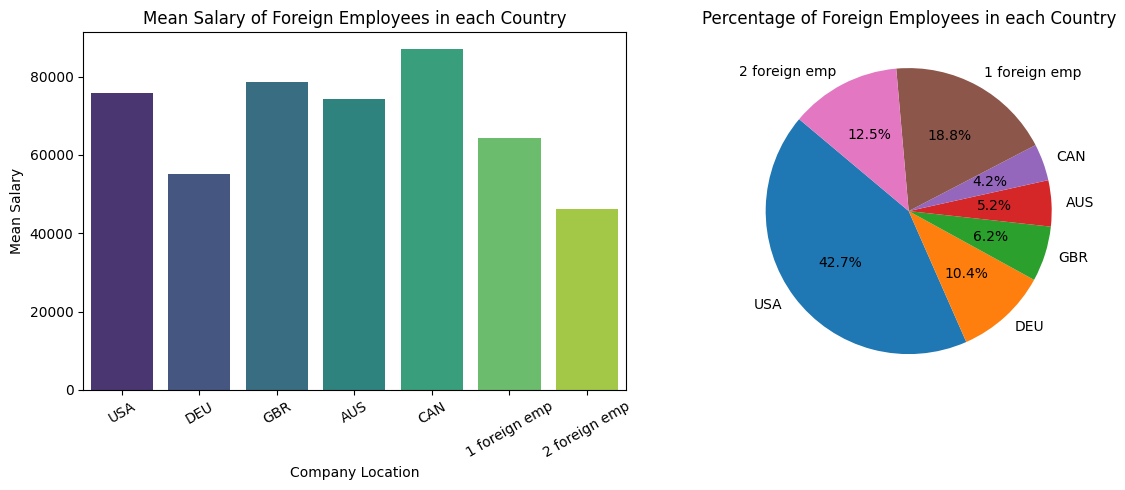

In [27]:
labels = filtered_foreign_df['company_location']
sizes = filtered_foreign_df['count']
salaries = filtered_foreign_df['mean_salary_in_usd']

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(x=labels, y=salaries, palette='viridis')
plt.xlabel('Company Location')
plt.ylabel('Mean Salary')
plt.title('Mean Salary of Foreign Employees in each Country')
plt.xticks(rotation=30)

plt.subplot(1, 2, 2)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Foreign Employees in each Country')

plt.tight_layout()
plt.show()

### **Description:**
This code creates a bar plot and a pie chart. The bar plot shows the mean salary of foreign employees by company location, while the pie chart shows the percentage distribution of foreign employees across different company locations. It uses the filtered_foreign_df DataFrame created in the previous snippet.

### **Result:**
The output consists of two visualizations:\
`Bar Plot:` Displays the mean salary of foreign employees in each country, indicating that the highest mean salary is in the USA and the lowest is for the countries with 2 foreign employees.\
`Pie Chart:` Shows the percentage distribution of foreign employees in each country, highlighting that the majority of foreign employees are in the USA (42.7%), followed by other countries with smaller percentages.

In [28]:
def plot_salary_and_distribution(df, group_col, xlabel, bar_title, pie_title):
    # Calculate the mean salary for each group
    mean_salary_by_group = df.groupby(group_col)['salary_in_usd'].mean().reset_index()
    
    # Calculate the count of entries per group for the pie chart
    count_by_group = df[group_col].value_counts().reset_index()
    count_by_group.columns = [group_col, 'count']
    
    plt.figure(figsize=(9, 5))
    
    # Bar plot for average salary by group
    plt.subplot(1, 2, 1)
    sns.barplot(x=group_col, y='salary_in_usd', data=mean_salary_by_group, palette='viridis')
    plt.xlabel(xlabel)
    plt.ylabel('Average Salary in USD')
    plt.title(bar_title)
    plt.xticks(rotation=45)
    
    # Pie chart for the percentage of entries by group
    plt.subplot(1, 2, 2)
    plt.pie(count_by_group['count'], labels=count_by_group[group_col], autopct='%1.1f%%', startangle=140)
    plt.title(pie_title)
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

### **Description:**
The above function generates two visualizations for salary data: a bar plot showing the average salary by a specified group and a pie chart displaying the percentage distribution of entries for each group. The function takes a DataFrame, the column name to group by, x-axis label, bar plot title, and pie chart title as inputs. This helps in easily comparing salary trends and entry distributions within the dataset.

### **Average Salary and percentage of Entries by work year**

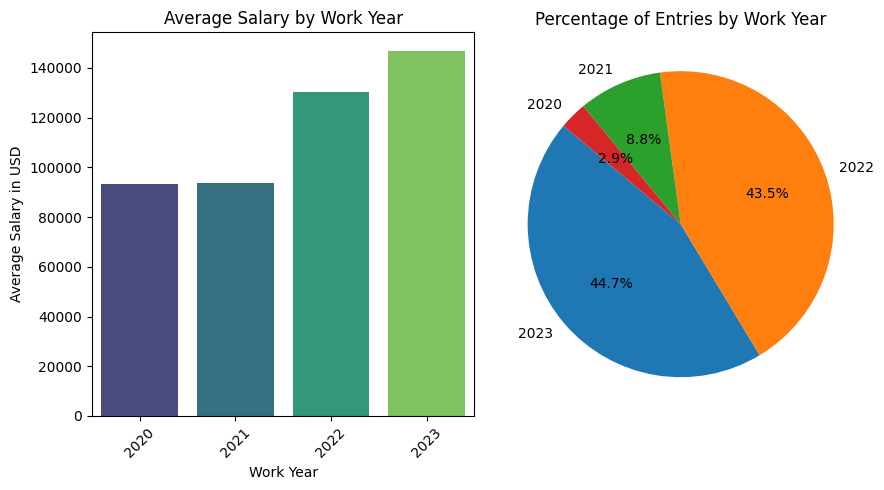

In [29]:
plot_salary_and_distribution(
    df=df4,
    group_col='work_year',
    xlabel='Work Year',
    bar_title='Average Salary by Work Year',
    pie_title='Percentage of Entries by Work Year'
)

### **Description:**
This vizulization create two charts:\
`Bar chart:` Showing the Average salary of people who have been worked in 2020 to 2023. The x-axis is the year, and the y-axis is the average salary.\
`Pie chart:` Showing the percentage of Entries from 2020 to 2023.

### **Result:**
The highest Average Salary is in 2023.\
The highest percentage of Entries is in 2023 (44.7%).

### **Average salary by Experience level**

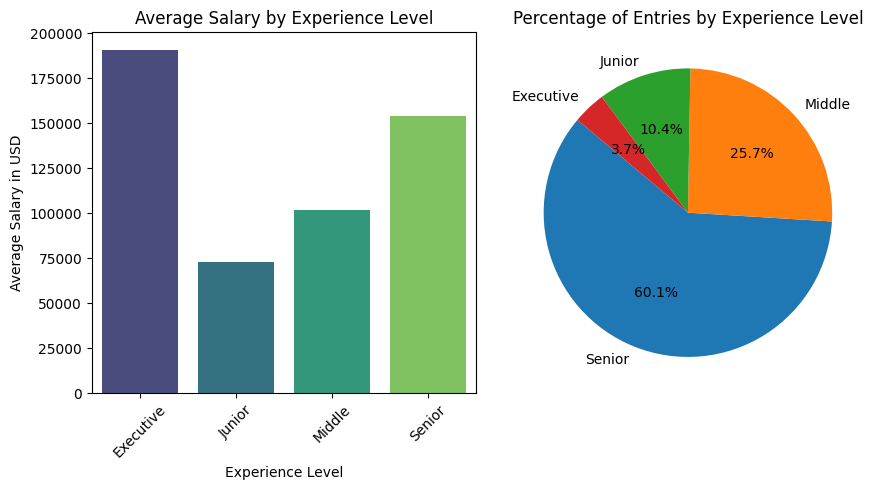

In [30]:
plot_salary_and_distribution(
    df=df4,
    group_col='experience_level',
    xlabel='Experience Level',
    bar_title='Average Salary by Experience Level',
    pie_title='Percentage of Entries by Experience Level'
)

### **Description:**
This vizulization create two charts:\
`Bar chart:` Showing the Average salary of people who have been worked by their Experience level like `excutive`,`junior`,`Middle`,`Senior`. The x-axis is the Experience level, and the y-axis is the average salary.\
`Pie chart:` Showing the percentage of Entries from by Experience level.
### **Result:**
In the bar chart, the Average salary of Excutive is the highest, and the average salary of Junior is the lowest.\
In the pie chart, the percentage of Entries of Senior is 60.1% is highest and the lowest is for Excutive 3.7%.

### **Average Salary by Remote ratio**

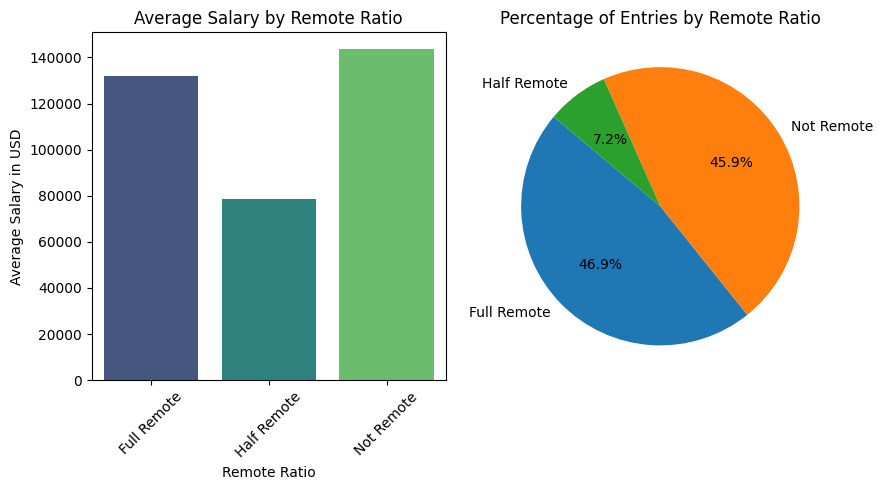

In [31]:
plot_salary_and_distribution(
    df=df4,
    group_col='remote_ratio',
    xlabel='Remote Ratio',
    bar_title='Average Salary by Remote Ratio',
    pie_title='Percentage of Entries by Remote Ratio'
)

### **Description:**
In this section, we utilize the plot_salary_and_distribution function to analyze and visualize the relationship between remote work arrangements and salary data, as well as the distribution of different remote work categories in our dataset.
### **Result:**
The generated visualization includes two plots:\
`Bar Plot:` Shows the average salary (in USD) for each remote work category (Full Remote, Half Remote, Not Remote). Indicates that Full Remote positions tend to have a higher average salary compared to Half Remote and Not Remote positions.\
`Pie Chart:`Displays the percentage distribution of entries across the different remote work categories. Reveals that the dataset is almost equally split between Full Remote (46.9%) and Not Remote (45.9%) positions, with a smaller proportion of Half Remote positions (7.2%).

### **Employment Type vs Remote ratio**

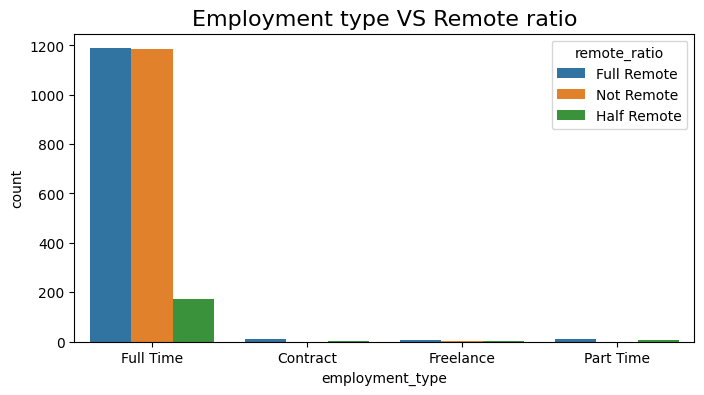

In [41]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(data=df4, x='employment_type', hue='remote_ratio')
ax.set_title('Employment type VS Remote ratio', fontdict={'fontsize': 16});

### **Description:**
This code creates a count plot to visualize the relationship between employment type and remote work ratio.

### **Result:**
The output is a count plot that shows the distribution of employment types and their respective remote work ratios. Each bar represents the count of each employment type, with different colors indicating the remote ratio categories (`'Full Remote'`, `'Not Remote'`, `'Half Remote'`).\
The majority of `'Full Time'` positions are either `'Full Remote'` or `'Not Remote'`, with a smaller proportion being `'Half Remote'`.\
`'Contract'`, `'Freelance'`, and `'Part Time'` positions are almost negligible in the dataset compared to `'Full Time'` positions.

### **Average Salary by Company Size**

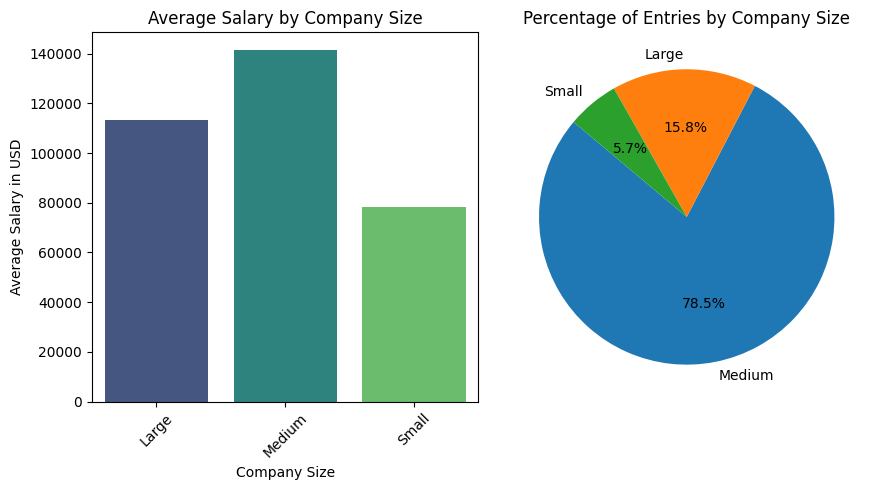

In [32]:
plot_salary_and_distribution(
    df=df4,
    group_col='company_size',
    xlabel='Company Size',
    bar_title='Average Salary by Company Size',
    pie_title='Percentage of Entries by Company Size'
)

### **Description:**
In this section, we use the plot_salary_and_distribution function to analyze and visualize the relationship between company size and salary data, as well as the distribution of different company sizes in our dataset.
### **Result:**
This generated vizulation shows that:\
`Bar Plot:`Shows the average salary (in USD) for each company size category (Large, Medium, Small). Indicates that Medium companies tend to offer the highest average salaries, followed by Large companies, with Small companies offering the lowest average salaries.\
`Pie Chart:`Displays the percentage distribution of entries across the different company size categories. Reveals that a significant majority of the dataset entries are from Medium companies (78.5%), followed by Large companies (15.8%), and a smaller proportion from Small companies (5.7%).

### **Top 10 job titles based on Average salary**

In [38]:
mean_salary_by_job = df4.groupby('job_title')['salary_in_usd'].mean().reset_index()
sorted_mean_salary_by_job = mean_salary_by_job.sort_values(by='salary_in_usd', ascending=False).reset_index().drop('index', axis=1)
sorted_mean_salary_by_job.head()

,job_title,salary_in_usd
0,Data Science Tech Lead,375000.000
1,Cloud Data Architect,250000.000
2,Data Lead,212500.000
3,Data Analytics Lead,211254.500
4,Principal Data Scientist,198171.125


### **Description:**
This code calculates the mean salary for each job title and sorts the job titles based on their mean salaries in descending order.\
The output is a DataFrame (sorted_mean_salary_by_job) that lists job titles along with their corresponding mean salaries, sorted from highest to lowest. The top job title based on average salary is 'Data Science Tech Lead' with an average salary of $375,000, followed by 'Cloud Data Architect' with $250,000, and so on.

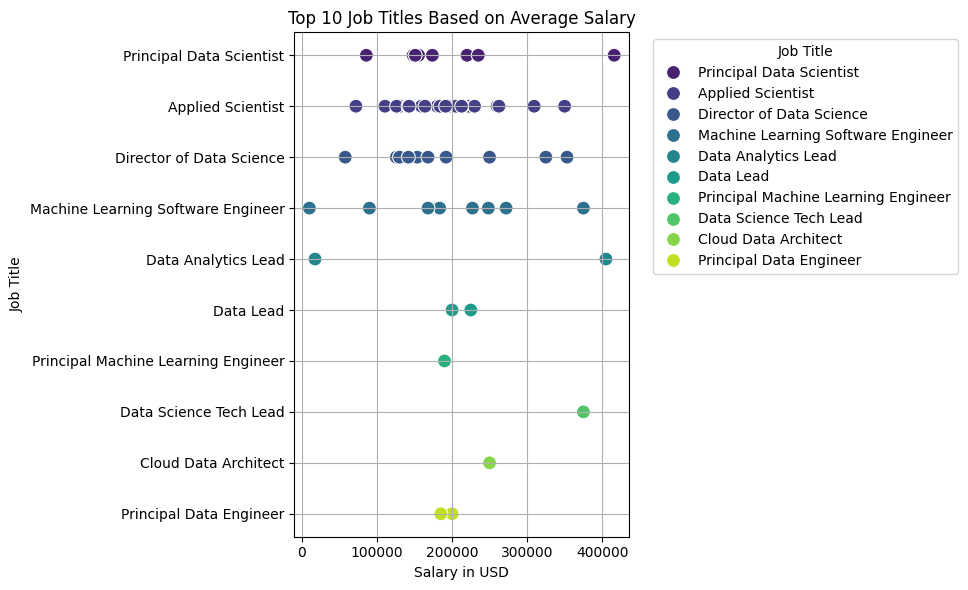

In [39]:
#top 10 job titles based on Aveage salary
top_10_job_titles = df4.groupby('job_title')['salary_in_usd'].mean().nlargest(10).index

filtered_df = df4[df4['job_title'].isin(top_10_job_titles)]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='salary_in_usd', y='job_title', hue='job_title', palette='viridis', s=100)

plt.xlabel('Salary in USD')
plt.ylabel('Job Title')
plt.title('Top 10 Job Titles Based on Average Salary')
plt.legend(title='Job Title', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.grid()
plt.show()

### **Description:**
This code creates a scatter plot to visualize the top 10 job titles based on average salary.

### **Result:**
The output is a scatter plot that shows the distribution of salaries for the top 10 job titles based on average salary. Each dot represents an individual salary for a particular job title, allowing us to see the range and distribution of salaries for these top-paying job titles.\
The scatter plot visually demonstrates the salary ranges for the top 10 job titles, making it easy to compare their average salaries. For instance, the plot shows that 'Principal Data Scientist' has a wide range of salaries, with many salaries clustering around $200,000 to $300,000.

### **Top 10 most Frequent Jobs based on Average Salary**

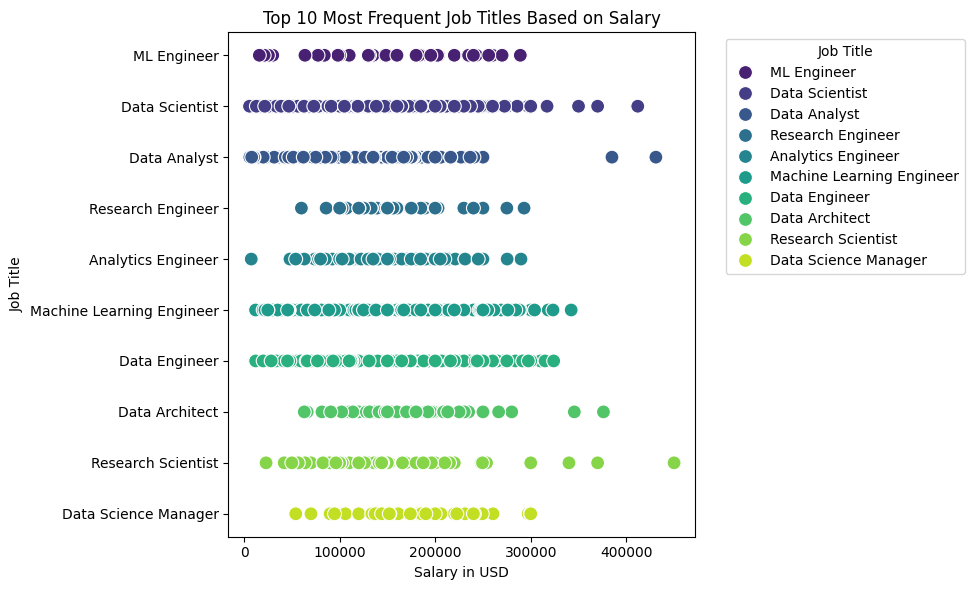

In [40]:
#top 10 most frequent jobs based on average Salary
top_10_frequent_job_titles = df4['job_title'].value_counts().nlargest(10).index

filtered_df = df4[df4['job_title'].isin(top_10_frequent_job_titles)]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='salary_in_usd',
                y='job_title', hue='job_title', palette='viridis', s=100)

plt.xlabel('Salary in USD')
plt.ylabel('Job Title')
plt.title('Top 10 Most Frequent Job Titles Based on Salary')
plt.legend(title='Job Title', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

### **Description:**
This code creates a scatter plot to visualize the salaries of the top 10 most frequent job titles in the dataset.

### **Result:**
The output is a scatter plot that shows the distribution of salaries for the top 10 most frequent job titles. Each dot represents an individual salary for a particular job title, allowing us to see the range and distribution of salaries for these frequently occurring job titles.\
The scatter plot visually demonstrates the salary ranges for the top 10 most frequent job titles, making it easy to compare their salary distributions. For instance, the plot shows that 'ML Engineer' and 'Data Scientist' have a wide range of salaries with many data points, indicating their high frequency in the dataset.

# **Conclusion**
---
In conclusion, our analysis of the 'data science salaries 2023' dataset,we observed that salaries significantly vary based on experience, job title, and geographic location. Specifically, data scientists who possess advanced skills and have accumulated more years of experience tend to earn higher salaries. Notably, machine learning engineers emerged as the highest earners among the various roles analyzed, indicating a strong demand for expertise in this area.

Our use of visualizations, such as box plots and scatter plots, played a crucial role in elucidating these trends. For instance, the box plots effectively illustrated the salary distributions across different job titles, allowing us to see the disparities clearly. This visual representation helped us understand not just average salaries but also the range and spread of salaries within each role.

However, it is important to acknowledge the limitations of our analysis. The dataset may not provide a comprehensive view of the entire industry, potentially introducing biases that could affect our findings. Factors such as regional salary variations and the representation of different job titles should be considered when interpreting the results.

Given these insights, we recommend that companies focus on offering competitive salaries to attract and retain talented professionals in the data science field. As the market continues to evolve, staying informed about salary dynamics will be essential for organizations aiming to maintain a competitive edge.

Finally, we suggest avenues for future research to deepen our understanding of salary dynamics. This could include analyzing trends over time or investigating how emerging technologies impact salary structures within the industry.

---


# **Good luck** 
---

## **EDA BY**: `Muhammad Abdur Rehman`